In [302]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)


In [303]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2.5.0


In [304]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

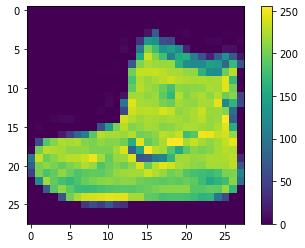

In [305]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [306]:
train_images = train_images / 255.0

test_images = test_images / 255.0

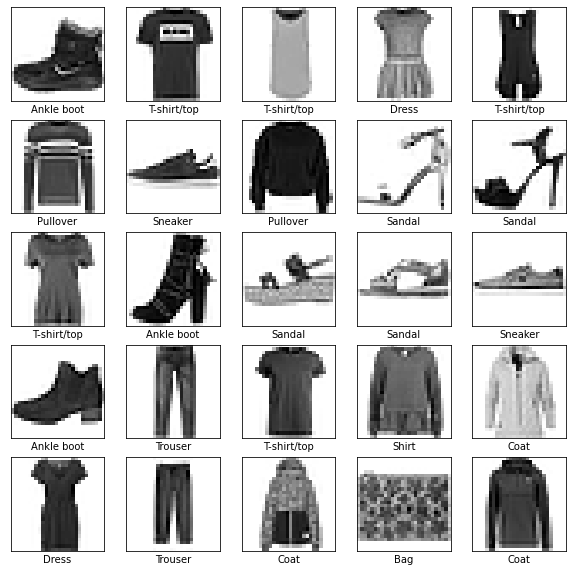

In [307]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [308]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [309]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [310]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 778us/step - loss: 0.5015 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 2s 834us/step - loss: 0.3751 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 1s 741us/step - loss: 0.3382 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 1s 716us/step - loss: 0.3160 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 1s 714us/step - loss: 0.2975 - accuracy: 0.8899


In [311]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3470 - accuracy: 0.8747

테스트 정확도: 0.8747000098228455


In [312]:
predictions = model.predict(test_images)
predictions[0]

array([1.7056791e-05, 3.6036600e-09, 1.9505194e-07, 2.4213323e-08,
       9.8152950e-06, 6.6815526e-03, 3.5879357e-06, 1.1148359e-02,
       1.4764168e-05, 9.8212469e-01], dtype=float32)

In [313]:
np.argmax(predictions[0])

9

In [314]:
test_labels[0]

9

In [315]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

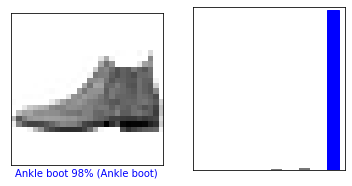

In [316]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

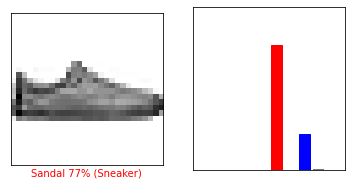

In [317]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

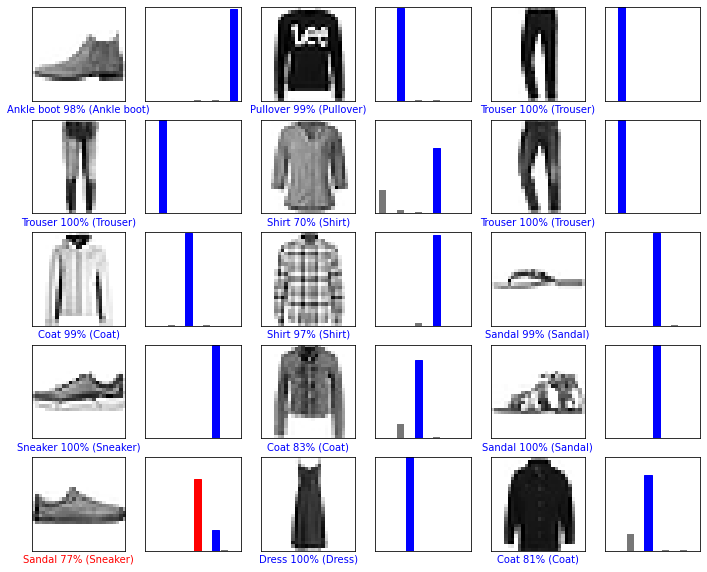

In [325]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [326]:
#predictions_single = model.predict(img_tensor)
img = test_images[0]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[1.7056775e-05 3.6036600e-09 1.9505229e-07 2.4213323e-08 9.8152859e-06
  6.6815526e-03 3.5879425e-06 1.1148359e-02 1.4764139e-05 9.8212469e-01]]


예측기 목록이 업데이트되었습니다:

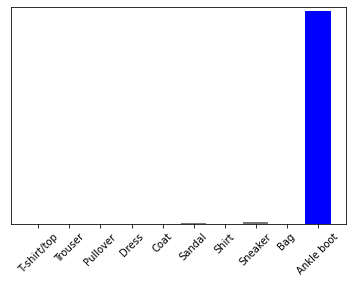

In [327]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [328]:
np.argmax(predictions_single[0])

9

(602, 404, 4)
(512, 256, 4)


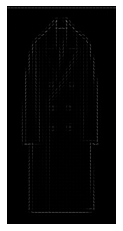

In [330]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('coat.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

(512, 256)


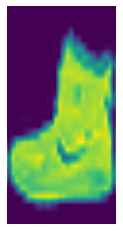

In [291]:
# resizing image
resized_img = resize(train_images[0], (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

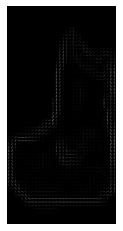

In [292]:
# reading the image
img = train_images[0]
resized_img = resize(img, (128*4, 64*4))
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=False)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

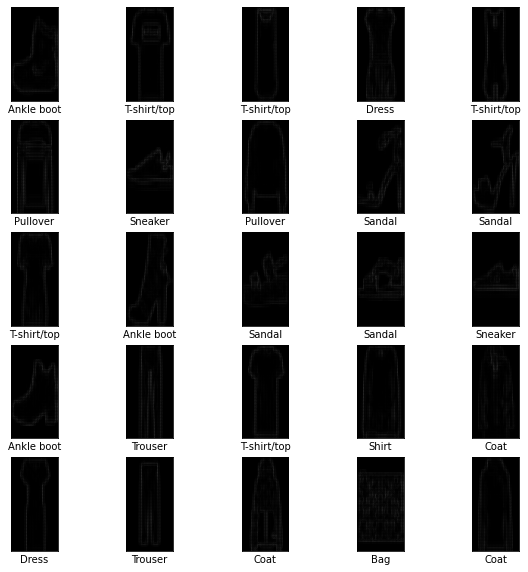

In [301]:
plt.figure(figsize=(10,10))
for i in range(25):
    img = train_images[i]
    resized_img = resize(img, (128*4, 64*4))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hog_image, cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [319]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import keras 
import os # miscellaneous operating system interfaces

import shutil # high-level file operations

In [320]:
base_dir='/Users/congd/Downloads'
img_dir='/Users/congd/Downloads/data'
len(os.listdir(img_dir))
os.listdir(img_dir)[:10]

['coat.jpg', 'coat.png', 'labels.txt']

In [321]:
base_dir='/Users/congd/Downloads'
img_dir='/Users/congd/Downloads/data'
len(os.listdir(img_dir))
os.listdir(img_dir)[:10]

['coat.jpg', 'coat.png', 'labels.txt']

In [322]:
img_tensor = resize(img_tensor, (28, 28,1))

In [323]:

# scaling into [0, 1]

img_tensor =img_tensor / 255.
img_tensor = np.squeeze(img_tensor, axis=2)


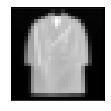

In [324]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_tensor, cmap=plt.cm.binary)
plt.show()

In [338]:
plt.figure(figsize=(10,10))
for i in range(60000):
    img = train_images[i]
    #resized_img = resize(img, (28, 28))
    fd, train_images[i] = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)

<Figure size 720x720 with 0 Axes>

In [339]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.6764 - accuracy: 0.7574
Epoch 2/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.5347 - accuracy: 0.8050
Epoch 3/5
1875/1875 [==============================] - 2s 836us/step - loss: 0.4991 - accuracy: 0.8188
Epoch 4/5
1875/1875 [==============================] - 2s 844us/step - loss: 0.4739 - accuracy: 0.8288
Epoch 5/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.4553 - accuracy: 0.8335


In [340]:
fd, img_tensor = hog(img_tensor, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), visualize=True, multichannel=False)

In [343]:
img_tensor = (np.expand_dims(img_tensor,0))

predictions_single = model.predict(img_tensor)
#print(predictions_single)

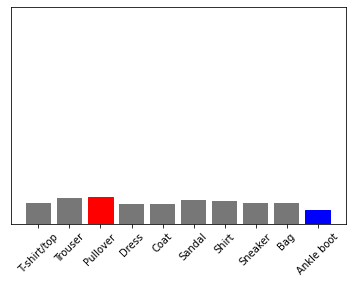

In [344]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [345]:
np.argmax(predictions_single[0])

2